In [1]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import *
import matplotlib.pyplot as plt


categ_table = pd.DataFrame(dict(names=['Peter', 'Jack', 'Eelin', 'John'],
                                vals1=[259, 83, 123, 162],
                                vals2=[159, 183, 23, 262],
                                vals3=[85, 48, 83, 67]))
categ_table = categ_table.set_index('names')
df_rowsum = categ_table.apply(
    lambda x: x.sum(), axis=1).sort_values(ascending=False)

N = len(df_rowsum)
ndeep = 10
Width = 2
mydata = pd.DataFrame(columns=["x", "y", "type"])
j = 0
for i in df_rowsum.index:
    print(i)
    x = df_rowsum[i]
    a = np.arange(1, ndeep+1, 1)
    b = np.arange(1, np.ceil(x/ndeep)+1, 1)
    X, Y = np.meshgrid(a, b)
    df_grid = pd.DataFrame({'x': X.flatten(), 'y': Y.flatten()})

    category = np.repeat(categ_table.columns, categ_table.loc[i, :])

    df_grid = df_grid.loc[np.arange(0, len(category)), :]
    df_grid['x'] = df_grid['x']+j*ndeep+j*Width
    j = j+1
    df_grid['type'] = category
    mydata = mydata.append(df_grid)

mydata['type'] = pd.Categorical(mydata['type'], categories=categ_table.columns, ordered=True)
mydata['x'] = mydata['x'].astype(float)
x_breaks = (np.arange(0, N)+1)*ndeep+np.arange(0, N)*Width-ndeep/2
x_label = df_rowsum.index

mydata_label = pd.DataFrame(
    dict(y=np.ceil(df_rowsum) / ndeep+2, x=x_breaks, label=df_rowsum))
breaks = np.arange(0, 55, 10)

mydata


Peter
John
Jack
Eelin


,x,y,type
0,1.0,1.0,vals1
1,2.0,1.0,vals1
2,3.0,1.0,vals1
3,4.0,1.0,vals1
4,5.0,1.0,vals1
...,...,...,...
224,41.0,23.0,vals3
225,42.0,23.0,vals3
226,43.0,23.0,vals3
227,44.0,23.0,vals3


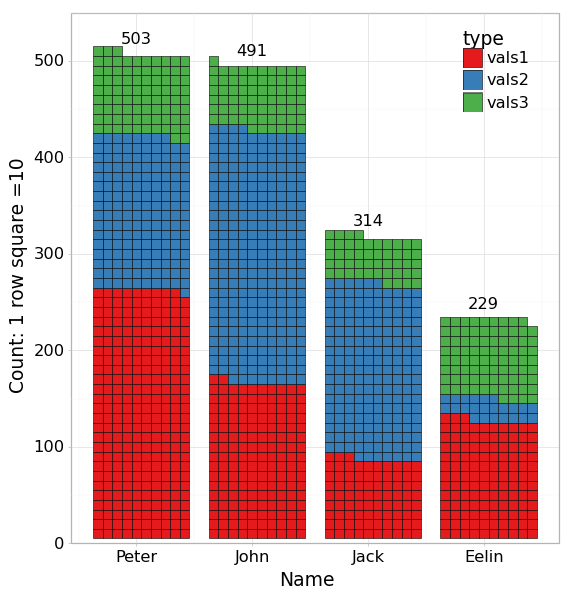

<ggplot: (179351973479)>


In [2]:
base_plot = (ggplot() +
             geom_tile(aes(x='x', y='y', fill='type'), mydata, color="k", size=0.25) +
             geom_text(aes(x='x', y='y', label='label'), data=mydata_label, size=13) +
             scale_fill_brewer(type='qual', palette="Set1") +
             xlab("Name") +
             ylab("Count: 1 row square =" + str(ndeep)) +
             coord_fixed(ratio=1) +
             scale_x_continuous(breaks=x_breaks, labels=x_label) +
             scale_y_continuous(breaks=breaks, labels=breaks*ndeep, limits=(0, 55), expand=(0, 0)) +
             theme_light() +
             theme(axis_title=element_text(size=15, face="plain", color="black"),
                   axis_text=element_text(
                       size=13, face="plain", color="black"),
                   legend_text=element_text(
                       size=13, face="plain", color="black"),
                   legend_title=element_text(
                       size=15, face="plain", color="black"),
                   legend_background=element_blank(),
                   legend_position=(0.8, 0.8),
                   figure_size=(7, 7),
                   dpi=90))
print(base_plot)


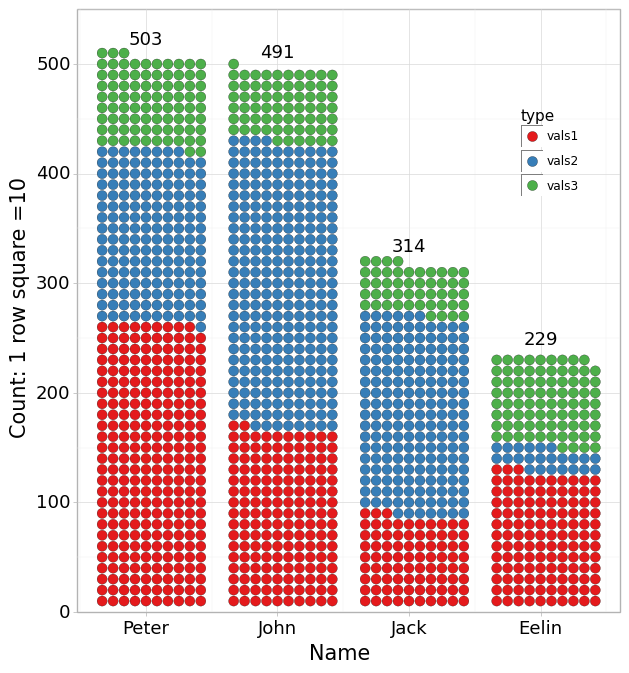

<ggplot: (179345519734)>


In [3]:
base_plot = (ggplot() +
             # The color of the lines between tiles
             geom_point(aes(x='x', y='y', fill='type'), mydata, shape='o', color="k", size=4, stroke=0.1) +
             # The color of the lines between tiles
             geom_text(aes(x='x', y='y', label='label'), data=mydata_label, size=13) +
             scale_fill_brewer(type='qual', palette="Set1") +
             xlab("Name") +
             ylab("Count: 1 row square =" + str(ndeep)) +
             coord_fixed(ratio=1) +
             scale_x_continuous(breaks=x_breaks, labels=x_label) +
             scale_y_continuous(breaks=breaks, labels=breaks*ndeep, limits=(0, 55), expand=(0, 0)) +
             theme_light() +
             theme(  # panel.border = element_rect(fill=NA,size = 2),
    axis_title=element_text(size=15, face="plain", color="black"),
    axis_text=element_text(size=13, face="plain", color="black"),
    legend_background=element_blank(),
    legend_position=(0.8, 0.7),
    # aspect_ratio =1,
    figure_size=(7, 7),
    dpi=100
)
)
print(base_plot)
